In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import random

In [3]:
for i in range(126):
    while True:
        rs=[0.01,0.02,0.03]
        r = rs[random.randint(0,2)]

        x = random.uniform(0.04,0.16)
        y = random.uniform(0.04,0.15)

        if x-r>=0.1 and x+r<=0.16 and y-r>=0.04 and y+r<=0.15:
            break
    if r==0.01:
        path = './ini/1/plassic%d.in' % i
        with open(path,'w') as f:  
            f.write('#domain: 0.240 0.210 0.002\n')
            f.write('#dx_dy_dz: 0.002 0.002 0.002\n')
            f.write('#time_window: 3e-9\n\n')
            f.write('#material: 6 0 1 0 half_space\n\n')
            f.write('#material: 2 1e-8 1 0 plastic\n\n')
            f.write('#waveform: ricker 1 1.5e9 my_ricker\n')
            f.write('#hertzian_dipole: z 0.040 0.170 0 my_ricker\n')
            f.write('#rx: 0.080 0.170 0\n')
            f.write('#src_steps: 0.002 0 0\n')
            f.write('#rx_steps: 0.002 0 0\n\n')
            f.write('#box: 0 0 0 0.240 0.170 0.002 half_space\n')
            f.write('#cylinder: %.3f %.3f 0 %.3f %.3f 0.002 %.3f plastic\n\n'%(x,y,x,y,r))
            f.write('#messages: n')
    if r==0.02:
        path = './ini/2/plassic%d.in' % i
        with open(path,'w') as f:  
            f.write('#domain: 0.240 0.210 0.002\n')
            f.write('#dx_dy_dz: 0.002 0.002 0.002\n')
            f.write('#time_window: 3e-9\n\n')
            f.write('#material: 6 0 1 0 half_space\n\n')
            f.write('#material: 2 1e-8 1 0 plastic\n\n')
            f.write('#waveform: ricker 1 1.5e9 my_ricker\n')
            f.write('#hertzian_dipole: z 0.040 0.170 0 my_ricker\n')
            f.write('#rx: 0.080 0.170 0\n')
            f.write('#src_steps: 0.002 0 0\n')
            f.write('#rx_steps: 0.002 0 0\n\n')
            f.write('#box: 0 0 0 0.240 0.170 0.002 half_space\n')
            f.write('#cylinder: %.3f %.3f 0 %.3f %.3f 0.002 %.3f plastic\n\n'%(x,y,x,y,r))
            f.write('#messages: n')
    if r==0.03:
        path = './ini/3/plassic%d.in' % i
        with open(path,'w') as f:  
            f.write('#domain: 0.240 0.210 0.002\n')
            f.write('#dx_dy_dz: 0.002 0.002 0.002\n')
            f.write('#time_window: 3e-9\n\n')
            f.write('#material: 6 0 1 0 half_space\n\n')
            f.write('#material: 2 1e-8 1 0 plastic\n\n')
            f.write('#waveform: ricker 1 1.5e9 my_ricker\n')
            f.write('#hertzian_dipole: z 0.040 0.170 0 my_ricker\n')
            f.write('#rx: 0.080 0.170 0\n')
            f.write('#src_steps: 0.002 0 0\n')
            f.write('#rx_steps: 0.002 0 0\n\n')
            f.write('#box: 0 0 0 0.240 0.170 0.002 half_space\n')
            f.write('#cylinder: %.3f %.3f 0 %.3f %.3f 0.002 %.3f plastic\n\n'%(x,y,x,y,r))
            f.write('#messages: n')




In [ ]:
for idx in range(126):
    !python -m gprMax ./ini/1/plassic{idx}.in -n 80
    !python -m tools.outputfiles_merge ./ini/1/plassic{idx} --remove-files
    !python -m tools.plot_BscanV2 ./ini/1/plassic{idx}_merged.out Ez
for idx in range(126):
    !python -m gprMax ./ini/2/plassic{idx}.in -n 80
    !python -m tools.outputfiles_merge ./ini/2/plassic{idx} --remove-files
    !python -m tools.plot_BscanV2 ./ini/2/plassic{idx}_merged.out Ez
for idx in range(126):
    !python -m gprMax ./ini/3/plassic{idx}.in -n 80
    !python -m tools.outputfiles_merge ./ini/3/plassic{idx} --remove-files
    !python -m tools.plot_BscanV2 ./ini/3/plassic{idx}_merged.out Ez

In [4]:
idx=0
!python -m gprMax ./ini/1/plassic{idx}.in -n 80
!python -m tools.outputfiles_merge ./ini/1/plassic{idx} --remove-files
!python -m tools.plot_BscanV2 ./ini/1/plassic{idx}_merged.out Ez


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.4 (Big Smoke)

 Copyright (C) 2015-2019: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

In [5]:
import os
from tools.plot_Bscan import get_output_data, mpl_plot
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def plotx(outputdata):   
    fig = plt.figure(figsize=(20, 10), facecolor='w', edgecolor='w')
    plt.imshow(outputdata, extent=[0, outputdata.shape[1], outputdata.shape[0] * dt, 0], interpolation='nearest', aspect='auto', cmap='seismic', vmin=-np.amax(np.abs(outputdata)), vmax=np.amax(np.abs(outputdata)))
    plt.set_cmap('gray')
    plt.axis('off')
    return plt

In [7]:
rxnumber = 1
rxcomponent = 'Ez'

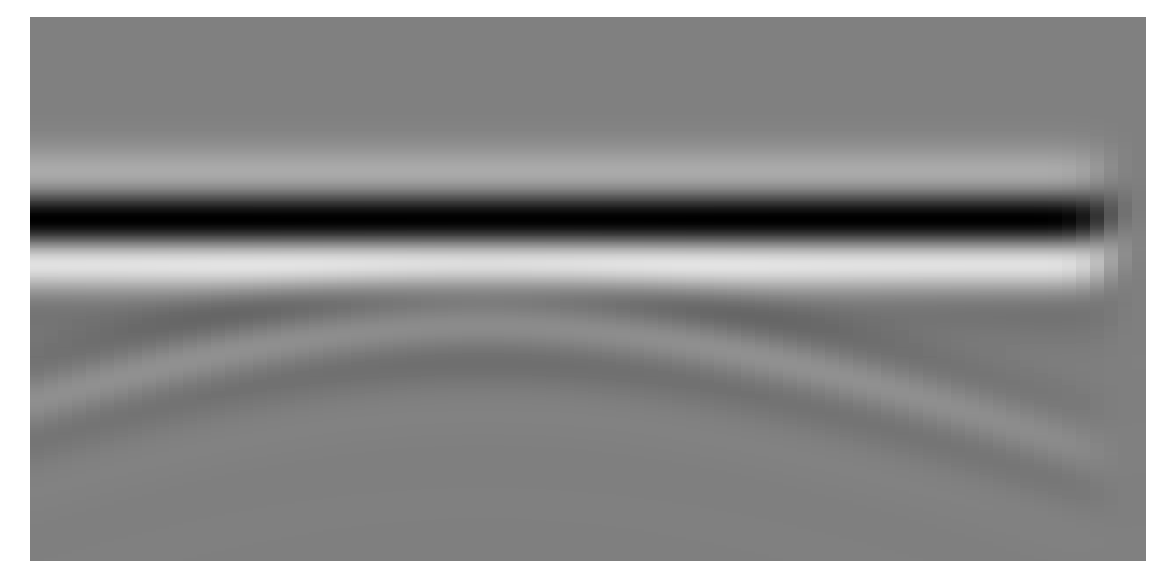

In [8]:
outputdata, dt = get_output_data('./ini/1/plassic0_merged.out', rxnumber, rxcomponent)
plt = plotx(outputdata)

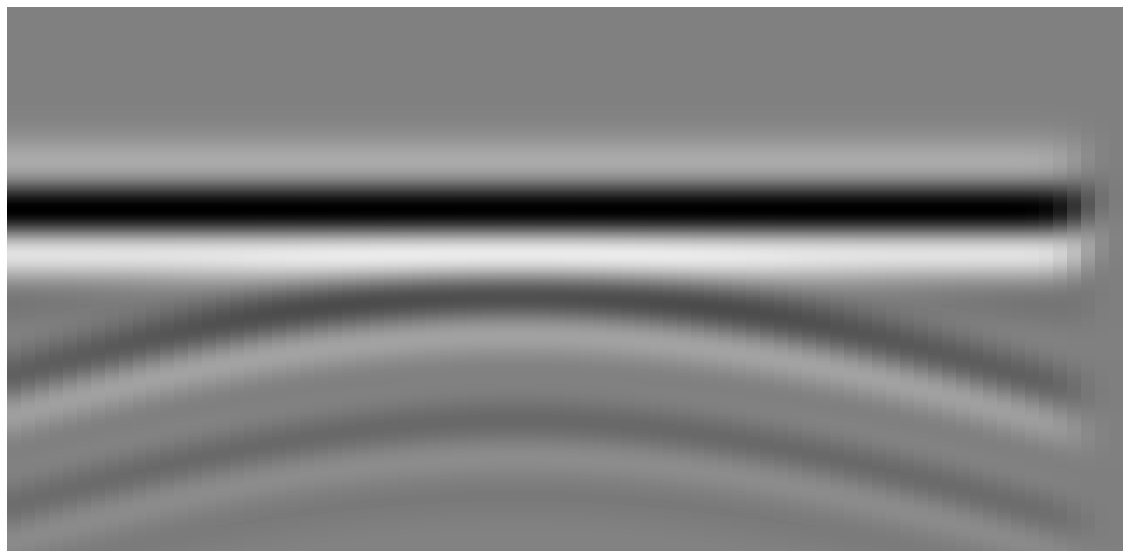

In [36]:
outputdata, dt = get_output_data('./ini/2/plassic0_merged.out', rxnumber, rxcomponent)
plt = plotx(outputdata)

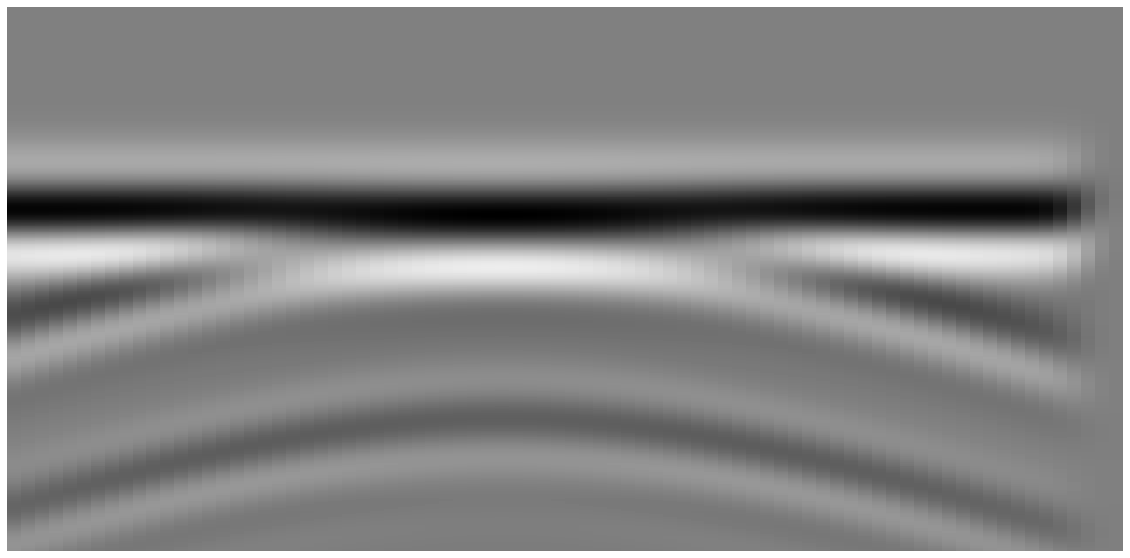

In [11]:
outputdata, dt = get_output_data('./ini/3/plassic0_merged.out', rxnumber, rxcomponent)
plt = plotx(outputdata)